In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [483]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from datetime import datetime

In [485]:
movements_df= pd.read_csv("C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/dataset.csv")
areas_df= pd.read_csv("C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/areas.csv")
for col in movements_df.columns: 
    print(col) 
#movements_df = movements_df.rename(columns={'date.1': 'Day/Date'})
movements_df['area_id'] = movements_df['area_id'].str[1:]

#str(movements_df)
dataTypeSeries = movements_df.dtypes
print(dataTypeSeries)
dataTypeSeries1 = areas_df.dtypes
print(dataTypeSeries1)
movements_df= movements_df.convert_objects(convert_numeric=True)
movements_df.dtypes

combined_df= pd.merge(areas_df,movements_df,on="area_id",how="right").reset_index(drop=True)

customer_id
session
timestamp
area_id
seq_id
time
date
Full Date
customer_id    object
session        object
timestamp       int64
area_id        object
seq_id          int64
time           object
date           object
Full Date      object
dtype: object
area_id                   int64
Area product category    object
dtype: object


C:\Users\apoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


In [4]:
combined_df.head()

,area_id,Area product category,customer_id,session,timestamp,seq_id,time,date,Full Date
0,1,umbrellas,cust0,ses1,1410404281,8,2:58:01 AM,9/11/2014,"Thursday, September 11, 2014"
1,1,umbrellas,cust0,ses2,1409806216,0,4:50:16 AM,9/4/2014,"Thursday, September 4, 2014"
2,1,umbrellas,cust0,ses2,1409806336,2,4:52:16 AM,9/4/2014,"Thursday, September 4, 2014"
3,1,umbrellas,cust0,ses2,1409806545,4,4:55:45 AM,9/4/2014,"Thursday, September 4, 2014"
4,1,umbrellas,cust0,ses2,1409806689,6,4:58:09 AM,9/4/2014,"Thursday, September 4, 2014"


In [12]:
combined_df['customer_id'].value_counts()[0:5]

cust369    446
cust537    437
cust404    436
cust504    423
cust360    416
Name: customer_id, dtype: int64

In [ ]:
#Which area has the most overall foot traffic
#Most visits to the mall by hour
#Most visits to the mall by day of week
#Histogram of customer visits

In [42]:
combined_df[(combined_df['customer_id']=='cust369')].sort_values(['session','seq_id']).head()

,area_id,Area product category,customer_id,session,timestamp,seq_id,time,date,Full Date,hour,day_of_week
76580,24,shirts,cust369,ses0,1406854758,0,12:59:18 AM,8/1/2014,"Friday, August 1, 2014",0,Saturday
84645,25,beauty and make up,cust369,ses0,1406854832,1,1:00:32 AM,8/1/2014,"Friday, August 1, 2014",1,Saturday
66847,20,bags,cust369,ses0,1406854895,2,1:01:35 AM,8/1/2014,"Friday, August 1, 2014",1,Saturday
84646,25,beauty and make up,cust369,ses0,1406854961,3,1:02:41 AM,8/1/2014,"Friday, August 1, 2014",1,Saturday
68883,21,household,cust369,ses0,1406855061,4,1:04:21 AM,8/1/2014,"Friday, August 1, 2014",1,Saturday


In [41]:
combined_df[combined_df['seq_id']==0]['day_of_week'].value_counts()

Saturday    2650
Name: day_of_week, dtype: int64

In [35]:
#Which area has the most overall foot traffic
df_overall_area = combined_df['Area product category'].value_counts().reset_index()

In [39]:
#Most visits to the mall by hour
combined_df['hour'] = combined_df['time'].apply(lambda x: pd.to_datetime(x).hour)

df_hour = combined_df[combined_df['seq_id']==0].groupby(['hour']).count()[['session']].reset_index()
df_hour.columns = ['hour','total_sessions']
df_hour

,hour,total_sessions
0,0,102
1,1,105
2,2,103
3,3,119
4,4,101
5,5,129
6,6,116
7,7,130
8,8,117
9,9,132


Text(0, 0.5, 'Total Sessions')

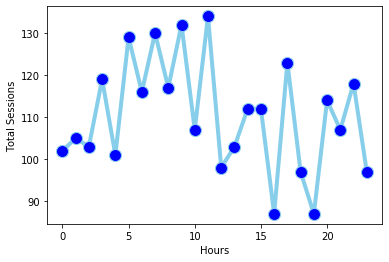

In [88]:
plt.plot(df_hour['hour'], df_hour['total_sessions'],marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xlabel('Hours')
plt.ylabel('Total Sessions')

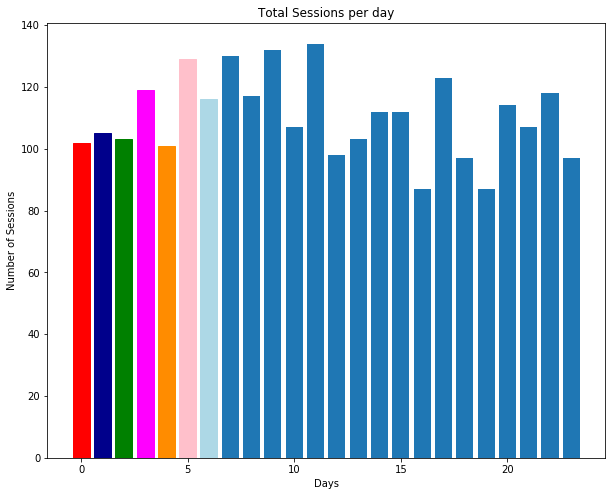

In [86]:
fig, ax = plt.subplots()

barlist=plt.bar(df_hour['hour'], df_hour['total_sessions'])
barlist[0].set_color('r')
barlist[1].set_color('darkblue')
barlist[2].set_color('green')
barlist[3].set_color('magenta')
barlist[4].set_color('darkorange')
barlist[5].set_color('pink')
barlist[6].set_color('lightblue')
barlist[6].set_color('lightblue')
fig.set_size_inches(10,8)
plt.title('Total Sessions per day')
plt.xlabel('Days')
plt.ylabel('Number of Sessions')
plt.show()

In [47]:
#Most visits to the mall by day of week
combined_df['day_of_week'] = pd.to_datetime(combined_df['date'], format="%m/%d/%Y").dt.day_name()

df_day_of_week = combined_df[combined_df['seq_id']==0]['day_of_week'].value_counts().reset_index()
df_day_of_week.columns = ['day_of_week','total_sessions']
df_day_of_week










,day_of_week,total_sessions
0,Monday,434
1,Saturday,382
2,Sunday,376
3,Wednesday,372
4,Friday,371
5,Tuesday,368
6,Thursday,347


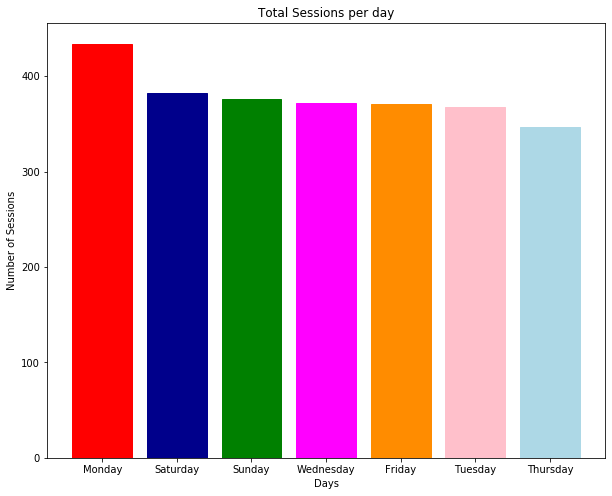

In [84]:
fig, ax = plt.subplots()

barlist=plt.bar(df_day_of_week['day_of_week'], df_day_of_week['total_sessions'])
barlist[0].set_color('r')
barlist[1].set_color('darkblue')
barlist[2].set_color('green')
barlist[3].set_color('magenta')
barlist[4].set_color('darkorange')
barlist[5].set_color('pink')
barlist[6].set_color('lightblue')
fig.set_size_inches(10,8)
plt.title('Total Sessions per day')
plt.xlabel('Days')
plt.ylabel('Number of Sessions')
plt.show()

In [63]:
#Histogram of customers by sesion counts

df_customer_sessions = combined_df.groupby(['session'])['customer_id'].nunique().reset_index()
df_customer_sessions.columns = ['session_count', 'customer_count']
df_customer_sessions['actual_customer_count'] = df_customer_sessions['customer_count'] - df_customer_sessions['customer_count'].shift(-1).replace(np.nan,0)
df_customer_sessions['pct_of_total'] = round(df_customer_sessions['actual_customer_count']/sum(df_customer_sessions['actual_customer_count']),3)
df_customer_sessions['session_count'] = df_customer_sessions['session_count'].apply(lambda x: int(x[-1])+1)
df_customer_sessions

,session_count,customer_count,actual_customer_count,pct_of_total
0,1,600,71.0,0.118
1,2,529,83.0,0.138
2,3,446,81.0,0.135
3,4,365,65.0,0.108
4,5,300,92.0,0.153
5,6,208,68.0,0.113
6,7,140,78.0,0.130
7,8,62,62.0,0.103


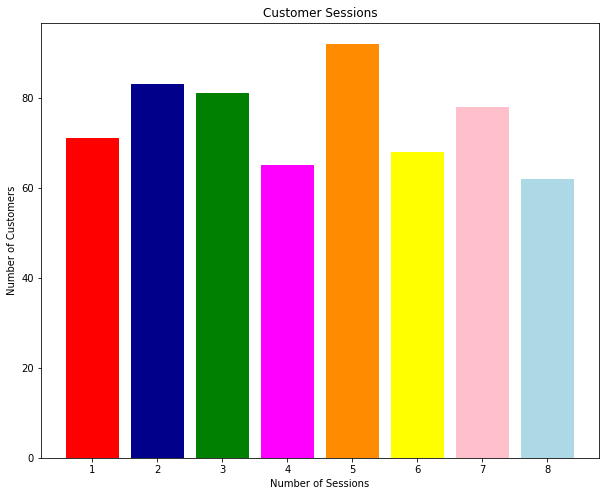

In [92]:
fig, ax = plt.subplots()

barlist=plt.bar(df_customer_sessions['session_count'], df_customer_sessions['actual_customer_count'])
barlist[0].set_color('r')
barlist[1].set_color('darkblue')
barlist[2].set_color('green')
barlist[3].set_color('magenta')
barlist[4].set_color('darkorange')
barlist[5].set_color('yellow')
barlist[6].set_color('pink')
barlist[7].set_color('lightblue')
fig.set_size_inches(10,8)
plt.title('Customer Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Customers')
plt.show()

In [59]:
df_customer_sessions['customer_count'].shift(-1).replace(np.nan,0)

0    529.0
1    446.0
2    365.0
3    300.0
4    208.0
5    140.0
6     62.0
7      0.0
Name: customer_count, dtype: float64

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [94]:
combined_df.head()

,area_id,Area product category,customer_id,session,timestamp,seq_id,time,date,Full Date,hour,day_of_week
0,1,umbrellas,cust0,ses1,1410404281,8,2:58:01 AM,9/11/2014,"Thursday, September 11, 2014",2,Thursday
1,1,umbrellas,cust0,ses2,1409806216,0,4:50:16 AM,9/4/2014,"Thursday, September 4, 2014",4,Thursday
2,1,umbrellas,cust0,ses2,1409806336,2,4:52:16 AM,9/4/2014,"Thursday, September 4, 2014",4,Thursday
3,1,umbrellas,cust0,ses2,1409806545,4,4:55:45 AM,9/4/2014,"Thursday, September 4, 2014",4,Thursday
4,1,umbrellas,cust0,ses2,1409806689,6,4:58:09 AM,9/4/2014,"Thursday, September 4, 2014",4,Thursday


In [449]:
kmeans_df=combined_df.groupby(['customer_id'])['Area product category'].value_counts()

In [450]:
df_kmeans = kmeans_df.to_frame()

In [451]:
df_kmeans.columns = ['count']

In [452]:
df_kmeans.reset_index(inplace=True)

In [453]:
df_kmeans.columns = ['customer_id','Area product category','count']

In [454]:
df_kmeans.index.name= 'index'

In [455]:
df_kmeans

,customer_id,Area product category,count
index,,,
0,cust0,beauty and make up,14
1,cust0,bags,10
2,cust0,cloaks,5
3,cust0,umbrellas,5
4,cust0,belts,4
5,cust0,gloves,4
6,cust0,jackets,4
7,cust0,cashiers,3
8,cust0,pants,3


In [504]:
top5_cust=(df_kmeans.sort_values('count', ascending=False)[:10])

In [542]:
top5_cust

,customer_id,Area product category,count
index,,,
9995,cust504,beauty and make up,61
8690,cust451,beauty and make up,53
6473,cust361,beauty and make up,51
8041,cust422,beauty and make up,50
631,cust124,beauty and make up,49
10786,cust537,beauty and make up,49
9028,cust465,beauty and make up,49
3419,cust239,beauty and make up,49
5714,cust331,beauty and make up,48


In [ ]:
bottom10_cust=(df_kmeans.sort_values('count', ascending=True)[:10])

In [530]:
a=combined_df['Area product category'].value_counts()

In [531]:
a_df= a.to_frame()

In [532]:
a_df.columns=['count']

In [533]:
a_df.reset_index(inplace=True)

In [535]:
a_df.columns=['category','count']

In [536]:
a_df

,category,count
0,beauty and make up,10981
1,scarfs,7060
2,belts,5881
3,tops,5693
4,umbrellas,5389
5,bags,5332
6,gloves,5112
7,cloaks,4475
8,jackets,3859
9,shirts,3690


In [537]:
top5_categ=(a_df.sort_values('count', ascending=False)[:5])

In [539]:
top5_categ

,category,count
0,beauty and make up,10981
1,scarfs,7060
2,belts,5881
3,tops,5693
4,umbrellas,5389


In [540]:
bottom5_categ=(a_df.sort_values('count', ascending=True)[:5])

In [541]:
bottom5_categ

,category,count
24,knitwear,1876
23,pants,1882
22,short trousers,1933
21,household,1947
20,cardigans,1952


In [548]:
for col in df_kmeans.columns: 
    print(col) 

customer_id
Area product category
count


In [606]:
new= pd.pivot_table(df_kmeans,index='customer_id',columns='Area product category',values='count')

In [607]:
new

Area product category,baby/kids clothing,bags,beauty and make up,belts,blazers,cardigans,cashiers,cloaks,gloves,household,...,professional clothing,raincoats,scarfs,shirts,short dresses,short trousers,skirts,sweatshirts,tops,umbrellas
customer_id,,,,,,,,,,,,,,,,,,,,,
cust0,NaN,10.0,14.0,4.0,NaN,NaN,3.0,5.0,4.0,2.0,...,1.0,NaN,2.0,3.0,2.0,2.0,NaN,3.0,2.0,5.0
cust1,5.0,14.0,28.0,11.0,7.0,2.0,7.0,20.0,11.0,3.0,...,6.0,9.0,21.0,8.0,8.0,9.0,10.0,8.0,15.0,23.0
cust10,NaN,4.0,5.0,4.0,3.0,2.0,3.0,2.0,2.0,NaN,...,1.0,NaN,8.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0
cust100,2.0,9.0,7.0,10.0,1.0,5.0,5.0,5.0,9.0,1.0,...,3.0,3.0,14.0,5.0,8.0,NaN,5.0,4.0,11.0,9.0
cust101,6.0,20.0,30.0,18.0,9.0,7.0,7.0,10.0,15.0,6.0,...,11.0,9.0,27.0,11.0,4.0,6.0,6.0,6.0,13.0,17.0
cust102,4.0,4.0,15.0,6.0,4.0,1.0,3.0,7.0,3.0,3.0,...,4.0,4.0,7.0,4.0,2.0,2.0,1.0,2.0,6.0,7.0
cust103,1.0,8.0,7.0,4.0,2.0,1.0,4.0,1.0,3.0,NaN,...,1.0,2.0,4.0,5.0,5.0,NaN,5.0,1.0,8.0,8.0
cust104,5.0,9.0,15.0,9.0,2.0,5.0,7.0,8.0,5.0,3.0,...,4.0,3.0,8.0,5.0,7.0,3.0,4.0,3.0,15.0,8.0
cust105,6.0,5.0,15.0,6.0,NaN,NaN,2.0,5.0,15.0,7.0,...,NaN,2.0,5.0,5.0,4.0,5.0,3.0,1.0,12.0,3.0


In [608]:
new=new.fillna(0)

In [609]:
new

Area product category,baby/kids clothing,bags,beauty and make up,belts,blazers,cardigans,cashiers,cloaks,gloves,household,...,professional clothing,raincoats,scarfs,shirts,short dresses,short trousers,skirts,sweatshirts,tops,umbrellas
customer_id,,,,,,,,,,,,,,,,,,,,,
cust0,0.0,10.0,14.0,4.0,0.0,0.0,3.0,5.0,4.0,2.0,...,1.0,0.0,2.0,3.0,2.0,2.0,0.0,3.0,2.0,5.0
cust1,5.0,14.0,28.0,11.0,7.0,2.0,7.0,20.0,11.0,3.0,...,6.0,9.0,21.0,8.0,8.0,9.0,10.0,8.0,15.0,23.0
cust10,0.0,4.0,5.0,4.0,3.0,2.0,3.0,2.0,2.0,0.0,...,1.0,0.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0
cust100,2.0,9.0,7.0,10.0,1.0,5.0,5.0,5.0,9.0,1.0,...,3.0,3.0,14.0,5.0,8.0,0.0,5.0,4.0,11.0,9.0
cust101,6.0,20.0,30.0,18.0,9.0,7.0,7.0,10.0,15.0,6.0,...,11.0,9.0,27.0,11.0,4.0,6.0,6.0,6.0,13.0,17.0
cust102,4.0,4.0,15.0,6.0,4.0,1.0,3.0,7.0,3.0,3.0,...,4.0,4.0,7.0,4.0,2.0,2.0,1.0,2.0,6.0,7.0
cust103,1.0,8.0,7.0,4.0,2.0,1.0,4.0,1.0,3.0,0.0,...,1.0,2.0,4.0,5.0,5.0,0.0,5.0,1.0,8.0,8.0
cust104,5.0,9.0,15.0,9.0,2.0,5.0,7.0,8.0,5.0,3.0,...,4.0,3.0,8.0,5.0,7.0,3.0,4.0,3.0,15.0,8.0
cust105,6.0,5.0,15.0,6.0,0.0,0.0,2.0,5.0,15.0,7.0,...,0.0,2.0,5.0,5.0,4.0,5.0,3.0,1.0,12.0,3.0


In [612]:
new_df=new[['beauty and make up ','scarfs','belts','tops','umbrellas','knitwear','pants','short trousers','household','cardigans']]

In [613]:
new_df

Area product category,beauty and make up,scarfs,belts,tops,umbrellas,knitwear,pants,short trousers,household,cardigans
customer_id,,,,,,,,,,
cust0,14.0,2.0,4.0,2.0,5.0,2.0,3.0,2.0,2.0,0.0
cust1,28.0,21.0,11.0,15.0,23.0,7.0,8.0,9.0,3.0,2.0
cust10,5.0,8.0,4.0,3.0,1.0,0.0,2.0,2.0,0.0,2.0
cust100,7.0,14.0,10.0,11.0,9.0,2.0,1.0,0.0,1.0,5.0
cust101,30.0,27.0,18.0,13.0,17.0,8.0,3.0,6.0,6.0,7.0
cust102,15.0,7.0,6.0,6.0,7.0,1.0,2.0,2.0,3.0,1.0
cust103,7.0,4.0,4.0,8.0,8.0,0.0,2.0,0.0,0.0,1.0
cust104,15.0,8.0,9.0,15.0,8.0,3.0,5.0,3.0,3.0,5.0
cust105,15.0,5.0,6.0,12.0,3.0,8.0,1.0,5.0,7.0,0.0


In [552]:
for col in new.columns: 
    print(col) 

baby/kids clothing
bags
beauty and make up 
belts
blazers
cardigans
cashiers
cloaks
gloves
household
jackets
knitwear
long dress
long trousers
pants
professional clothing
raincoats
scarfs
shirts
short dresses
short trousers
skirts
sweatshirts
tops
umbrellas


In [614]:
new_df=new_df.fillna(0)

In [615]:
new_df

Area product category,beauty and make up,scarfs,belts,tops,umbrellas,knitwear,pants,short trousers,household,cardigans
customer_id,,,,,,,,,,
cust0,14.0,2.0,4.0,2.0,5.0,2.0,3.0,2.0,2.0,0.0
cust1,28.0,21.0,11.0,15.0,23.0,7.0,8.0,9.0,3.0,2.0
cust10,5.0,8.0,4.0,3.0,1.0,0.0,2.0,2.0,0.0,2.0
cust100,7.0,14.0,10.0,11.0,9.0,2.0,1.0,0.0,1.0,5.0
cust101,30.0,27.0,18.0,13.0,17.0,8.0,3.0,6.0,6.0,7.0
cust102,15.0,7.0,6.0,6.0,7.0,1.0,2.0,2.0,3.0,1.0
cust103,7.0,4.0,4.0,8.0,8.0,0.0,2.0,0.0,0.0,1.0
cust104,15.0,8.0,9.0,15.0,8.0,3.0,5.0,3.0,3.0,5.0
cust105,15.0,5.0,6.0,12.0,3.0,8.0,1.0,5.0,7.0,0.0


In [463]:
np.max(new)

Area product category
baby/kids clothing       15.0
bags                     31.0
beauty and make up       61.0
belts                    42.0
blazers                  21.0
cardigans                17.0
cashiers                  8.0
cloaks                   26.0
gloves                   34.0
household                16.0
jackets                  30.0
knitwear                 13.0
long dress               30.0
long trousers            16.0
pants                    25.0
professional clothing    18.0
raincoats                19.0
scarfs                   44.0
shirts                   22.0
short dresses            15.0
short trousers           14.0
skirts                   18.0
sweatshirts              17.0
tops                     42.0
umbrellas                30.0
dtype: float64

In [616]:
new_df=new_df.replace(to_replace = [range(2,62)], value = 1)

In [617]:
new_df

Area product category,beauty and make up,scarfs,belts,tops,umbrellas,knitwear,pants,short trousers,household,cardigans
customer_id,,,,,,,,,,
cust0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
cust1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cust10,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
cust100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
cust101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cust102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cust103,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
cust104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cust105,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [628]:
new_df.to_csv("C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/new_df.csv")

In [626]:
type(new_df)

pandas.core.frame.DataFrame

In [627]:
df_transaction = as(new_df,"transactions")

SyntaxError: invalid syntax (<ipython-input-627-148391942d00>, line 1)

In [618]:
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster,init='k-means++', random_state=0)
    kmeans.fit(new_df)
    
    ssd.append(kmeans.inertia_)

In [ ]:
km = KMeans(
    n_clusters=2,  random_state=0
)
y_km = km.fit_predict(new_df)

In [597]:
my_frequemt_itemsets=apriori(new_df,min_support=0.07, use_colnames=True)

In [598]:
from mlxtend.frequent_patterns import association_rules

In [599]:
my_rules = association_rules(my_frequemt_itemsets,metric="lift",min_threshold=1)

AttributeError: 'generator' object has no attribute 'columns'

In [487]:
new.to_csv("C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/new.csv",index= False)

In [561]:
from apyori import apriori

In [568]:
association_rules = apriori(new_df, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [573]:
len(association_results)

4628

In [579]:
association_results[10]

RelationRecord(items=frozenset({'w', 'k'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'k'}), items_add=frozenset({'w'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'w'}), items_add=frozenset({'k'}), confidence=1.0, lift=5.0)])

In [470]:
new.to_csv("C:/Desktop/NUIG assignments sem2/Exam/Applied Customer Analytics/new.csv")

In [378]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
new=scaler.fit_transform(new)


In [619]:
# Find th correct value of K using Elbow Method
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster,init='k-means++', random_state=0)
    kmeans.fit(new)
    
    ssd.append(kmeans.inertia_)


In [623]:
km = KMeans(
    n_clusters=2,  random_state=0
)
y_km = km.fit_predict(new_df)

In [625]:
y_km

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

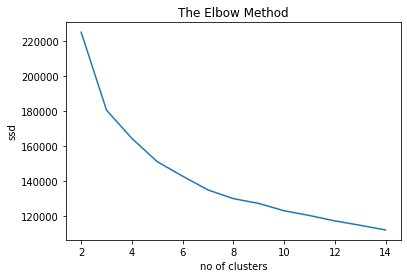

In [620]:
plt.plot(range(2,15), ssd)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

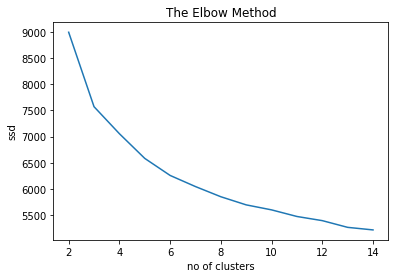

In [380]:
plt.plot(range(2,15), ssd)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

In [381]:
# Clustering done on K = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(new)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [386]:
km = KMeans(
    n_clusters=2,  random_state=0
)
y_km = km.fit_predict(new)

In [629]:
y_km

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

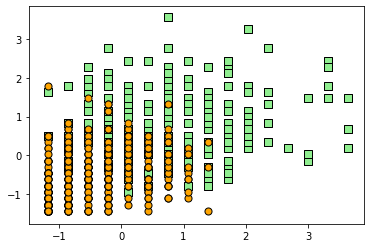

In [387]:
# plot the 3 clusters
plt.scatter(
    new[y_km == 0, 0], new[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    new[y_km == 1, 0], new[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)





In [236]:
clusterID = pd.DataFrame(labels)

In [238]:
clusteredData = pd.concat([new.reset_index(drop=True),clusterID],axis=1)


In [239]:
clusteredData

,baby/kids clothing,bags,beauty and make up,belts,blazers,cardigans,cashiers,cloaks,gloves,household,...,raincoats,scarfs,shirts,short dresses,short trousers,skirts,sweatshirts,tops,umbrellas,0
0,3.700000,10.0,14.0,4.0,3.700000,3.700000,3.0,5.000000,4.00,2.000000,...,3.700000,2.000000,3.000000,2.000000,2.000000,3.700000,3.000000,2.000000,5.000000,2
1,5.000000,14.0,28.0,11.0,7.000000,2.000000,7.0,20.000000,11.00,3.000000,...,9.000000,21.000000,8.000000,8.000000,9.000000,10.000000,8.000000,15.000000,23.000000,3
2,2.700000,4.0,5.0,4.0,3.000000,2.000000,3.0,2.000000,2.00,2.700000,...,2.700000,8.000000,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2
3,2.000000,9.0,7.0,10.0,1.000000,5.000000,5.0,5.000000,9.00,1.000000,...,3.000000,14.000000,5.000000,8.000000,5.500000,5.000000,4.000000,11.000000,9.000000,0
4,6.000000,20.0,30.0,18.0,9.000000,7.000000,7.0,10.000000,15.00,6.000000,...,9.000000,27.000000,11.000000,4.000000,6.000000,6.000000,6.000000,13.000000,17.000000,3
5,4.000000,4.0,15.0,6.0,4.000000,1.000000,3.0,7.000000,3.00,3.000000,...,4.000000,7.000000,4.000000,2.000000,2.000000,1.000000,2.000000,6.000000,7.000000,0
6,1.000000,8.0,7.0,4.0,2.000000,1.000000,4.0,1.000000,3.00,3.904762,...,2.000000,4.000000,5.000000,5.000000,3.904762,5.000000,1.000000,8.000000,8.000000,2
7,5.000000,9.0,15.0,9.0,2.000000,5.000000,7.0,8.000000,5.00,3.000000,...,3.000000,8.000000,5.000000,7.000000,3.000000,4.000000,3.000000,15.000000,8.000000,0
8,6.000000,5.0,15.0,6.0,5.318182,5.318182,2.0,5.000000,15.00,7.000000,...,2.000000,5.000000,5.000000,4.000000,5.000000,3.000000,1.000000,12.000000,3.000000,0
9,3.473684,2.0,6.0,2.0,1.000000,3.473684,3.0,13.000000,3.00,1.000000,...,2.000000,3.000000,4.000000,2.000000,6.000000,3.473684,3.473684,4.000000,6.000000,2


In [ ]:
plt.scatter(new[labels == 0, 0], new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(new[y_kmeans == 1, 0], new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new[y_kmeans == 2, 0], new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(new[y_kmeans == 3, 0], new[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(new[y_kmeans == 4, 0], new[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster)
    kmeans.fit(bskt_tot_df_scaled)
    
    ssd.append(kmeans.inertia_)

In [ ]:
for col in combined_df.columns: 
    print(col) 
combined_df['year'] = pd.DatetimeIndex(combined_df['date']).year
combined_df['month'] = pd.DatetimeIndex(combined_df['date']).month
combined_df['week']=pd.DatetimeIndex(combined_df['date']).week
combined_df['day']=pd.DatetimeIndex(combined_df['date']).weekday
combined_df['hour1'] = combined_df['timestamp'].hour()
combined_df['day_of_week'] = combined_df['Datetime'].dt.day_name()

In [ ]:
combined_df['hour']= combined_df['Datetime'].dt.hour
combined_df['Datetime'] = pd.to_datetime(combined_df['date'], format="%m/%d/%Y")
combined_df.dtypes

combined_df.drop(["week"], axis = 1, inplace = True) 
df=combined_df.iloc[:,2:4].reset_index(drop=True)
df['session']=df['session'].unique()

In [424]:
session_count=combined_df.groupby('customer_id')['session'].nunique().reset_index()

In [425]:
session_new= session_count['session']

In [426]:
session_new

0      3
1      7
2      3
3      5
4      7
5      3
6      4
7      7
8      2
9      3
10     1
11     8
12     6
13     7
14     7
15     2
16     7
17     4
18     7
19     4
20     5
21     1
22     3
23     6
24     8
25     1
26     1
27     6
28     1
29     7
      ..
570    4
571    2
572    4
573    7
574    6
575    5
576    1
577    5
578    7
579    8
580    6
581    4
582    7
583    1
584    7
585    8
586    4
587    4
588    7
589    4
590    7
591    7
592    6
593    1
594    1
595    5
596    3
597    5
598    2
599    1
Name: session, Length: 600, dtype: int64

In [432]:
session_new.dtypes

dtype('int64')

In [434]:
session_new=session_new.values

In [437]:
sess=session_new.reshape(-1, 1)

In [428]:
sess=session_new.values

In [411]:
from scipy.cluster.vq import whiten
scaled_data = whiten(sess)

In [438]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
new=scaler.fit_transform(sess)

In [413]:
new

array([[-0.63293754],
       [ 1.15418021],
       [-0.63293754],
       [ 0.26062134],
       [ 1.15418021],
       [-0.63293754],
       [-0.1861581 ],
       [ 1.15418021],
       [-1.07971697],
       [-0.63293754],
       [-1.52649641],
       [ 1.60095965],
       [ 0.70740078],
       [ 1.15418021],
       [ 1.15418021],
       [-1.07971697],
       [ 1.15418021],
       [-0.1861581 ],
       [ 1.15418021],
       [-0.1861581 ],
       [ 0.26062134],
       [-1.52649641],
       [-0.63293754],
       [ 0.70740078],
       [ 1.60095965],
       [-1.52649641],
       [-1.52649641],
       [ 0.70740078],
       [-1.52649641],
       [ 1.15418021],
       [-1.07971697],
       [ 0.26062134],
       [ 1.60095965],
       [-1.07971697],
       [ 1.60095965],
       [ 0.26062134],
       [ 1.15418021],
       [ 0.70740078],
       [-0.63293754],
       [ 0.26062134],
       [ 0.26062134],
       [-0.63293754],
       [ 1.15418021],
       [-1.07971697],
       [-1.07971697],
       [ 0

In [439]:
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster,init='k-means++', random_state=0)
    kmeans.fit(new)
    
    ssd.append(kmeans.inertia_)

C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Numbe

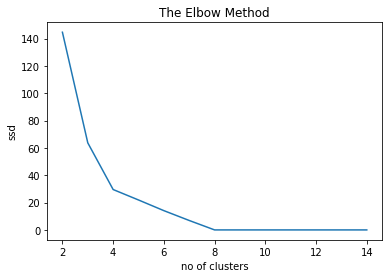

In [440]:
plt.plot(range(2,15), ssd)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

In [441]:
km = KMeans(
    n_clusters=4, random_state=0
)
y_km = km.fit_predict(new)

In [442]:
y_km.reshape(-1,1)

array([[0],
       [1],
       [0],
       [3],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [3],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [2],
       [0],
       [3],
       [1],
       [2],
       [2],
       [3],
       [2],
       [1],
       [2],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [3],
       [0],
       [3],
       [3],
       [0],
       [1],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [3],
       [1],
       [3],
       [2],
       [2],
       [2],
       [0],
       [3],
       [2],
       [0],
       [0],
       [3],
       [2],
       [0],
       [2],
       [1],
       [3],
       [2],
       [3],
       [0],
       [0],
       [0],
       [2],
       [3],
       [0],
       [1],
       [1],
       [2],
       [3],
       [2],
       [3],
       [1],
       [3],
       [2],
    

In [443]:
y_km.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [447]:
plt.scatter(
    new[y_km == 0,0], new[y_km == 0,1],
    s=150, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    new[y_km == 1,0], new[y_km == 1,1],
    s=150, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    new[y_km == 2,0], new[y_km == 2,1],
    s=150, c='green',
    marker=',', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    new[y_km == 3,0], new[y_km == 3,1],
    s=150, c='yellow',
    marker='+', edgecolor='black',
    label='cluster 2'
)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [420]:
plt.scatter(new[ : , 0], new[ : , 1], s =50)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [401]:
plt.scatter(y_km.cluster_centers_[:, 0], y_km.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [315]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
new=scaler.fit_transform(session_new.reshape(1, -1))

In [317]:
new

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [316]:
# Find th correct value of K using Elbow Method
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster,init='k-means++', random_state=0)
    kmeans.fit(new)
    
    ssd.append(kmeans.inertia_)

ValueError: n_samples=1 should be >= n_clusters=2

In [ ]:
session_count=combined_df.groupby('customer_id')['session'].nunique().reset_index()

print(session_count.idxmax())
session_count['session'].max()
session_count['session'].mean()
combined_df['customer_id'].max()
combined_df['customer_id'].max()


dt_object = datetime.fromtimestamp(combined_df['timestamp'])

loyal=session_count[session_count['session']>6]
colors = (0,0,0)
area = np.pi*20
y=loyal['session']
labels= loyal['customer_id']
plt.scatter(labels, y, s=area, c=colors, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('cust')
plt.ylabel('Frequency')
plt.gcf().set_size_inches((20,20))
plt.show()

session_count=session_count['session'][:10]
print(session_count.max())

plt.bar(loyal['session'], loyal['customer_id'])



day_count=combined_df.groupby('session')['day_of_week'].value_counts()
#time=combined_df.groupby('session')['time'].sum()


new_df= combined_df[['day_of_week','session','customer_id']]
v = new_df.groupby(['customer_id','session'])['day_of_week'].unique().reset_index()
v=v.to_frame()
for col in v.columns: 
    print(col) 
v['day_of_week'].value_counts()

new_df.groupby(['customer_id','session'])['day_of_week'].value_counts()
r = new_df.groupby(['customer_id'])['day_of_week'].nunique().reset_index()
r = new_df.groupby(['day_of_week'])['session'].value_counts()


v['day_of_week'].value_counts()
    
v.to_csv('C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/dayss.csv')
print(v)

v.index.str.split(',',expand=True)
ab=new_df[['day_of_week', 'session']]

a=ab.groupby('day_of_week')['session'].value_counts().to_frame()
a.reset_index()
value=combined_df['Datetime'].iloc[1]-combined_df['Datetime'].iloc[0]
print(value)
session_count.to_csv('C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/Session_count.csv')
combined_df.to_csv('C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/combined_df.csv')
new.to_csv("C:/Desktop/NUIG assignments sem2/Exam/Data Science and Big Data/day_analysis.csv")
